This file is part of GaPSE
Copyright (C) 2022 Matteo Foglieni

GaPSE is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

GaPSE is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
General Public License for more details.

You should have received a copy of the GNU General Public License
along with GaPSE. If not, see <http://www.gnu.org/licenses/>.

In [1]:
PATH_TO_GAPSE = "../";

In [2]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [3]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions
using Printf, LaTeXStrings

In [4]:
FILE_F_MAP = PATH_TO_GAPSE * "test/datatest/F_REFERENCE.txt"
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt"
FILE_BACKGROUND = PATH_TO_GAPSE * "test/datatest/WideA_ZA_background.dat"

z_min, z_max, θ_max = 0.05, 0.20, π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
    Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70, s_lim=1e-2,
    IPS_opts = Dict(:fit_left_min => 1e-6, :fit_left_max => 3e-6,
        :fit_right_min => 1e1, :fit_right_max => 2e1),
    IPSTools_opts = Dict(:N => 1024, :fit_min => 0.05, :fit_max => 0.5, 
        :con => true, :k_min => 1e-8, :k_max => 10.0),
)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP)

GaPSE.parameters_used(stdout, cosmo)

###############
#    GaPSE    #
############### 
#
# The Cosmology considered had the following paremeters:
# 
# - Matter Power Spectrum input file: "../test/datatest/file_pk.txt"
# - F window function input file: "../test/datatest/F_REFERENCE.txt"
# - Background data input file: "../test/datatest/WideA_ZA_background.dat"
#
# - Basic CosmoParams considered: 
#	 z_min = 0.05 	 z_max = 0.2
#	 θ_max = 1.5707963267948966 [rad] 	 h_0 = 0.7
#	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
#
# - CosmoParams about the Input Power Spectrum: 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#
# - CosmoParams about the Input Power Spectrum Tools: 
#	 k_max = 10.0 	 fit_max = 0.5 	 N = 1024 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 
#
# - Computed quantities: 
# 	 effective redshift z_eff = 0.15045636096023224 
# 	 comoving s_min = 148.1920001465757 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747

In [8]:
L = 0;

In [13]:
IMPLEMENTED_GR_EFFECTS = [
     "auto_doppler", "auto_lensing",
     "auto_localgp", "auto_integratedgp",

     "lensing_doppler", "doppler_lensing",
     "doppler_localgp", "localgp_doppler",
     "doppler_integratedgp",  "integratedgp_doppler",
     "lensing_localgp", "localgp_lensing",
     "lensing_integratedgp",  "integratedgp_lensing",
     "localgp_integratedgp", "integratedgp_localgp",
];

ξs_names = [
    L"$\xi^{v_{\parallel} \, v_{\parallel}}_{L=%$L}(s)$", 
    L"$\xi^{\kappa \, \kappa}_{L=%$L}(s)$", 
    L"$\xi^{\phi \, \phi}_{L=%$L}(s)$", 
    L"$\xi^{\int\phi \, \int\phi}_{L=%$L}(s)$", 
    
    L"$\xi^{\kappa \, v_{\parallel}}_{L=%$L}(s)$",
    L"$\xi^{v_{\parallel} \, \kappa}_{L=%$L}(s)$",
    
    L"$\xi^{v_{\parallel} \, \phi}_{L=%$L}(s)$",
    L"$\xi^{\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L"$\xi^{v_{\parallel} \, \int\phi}_{L=%$L}(s)$",
    L"$\xi^{\int\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L"$\xi^{\kappa \, \phi}_{L=%$L}(s)$",
    L"$\xi^{\phi \, \kappa}_{L=%$L}(s)$",
    
    L"$\xi^{\kappa \, \int\phi}_{L=%$L}(s)$",
    L"$\xi^{\int\phi \, \kappa}_{L=%$L}(s)$",
    
    L"$\xi^{\phi \, \int\phi}_{L=%$L}(s)$",
    L"$\xi^{\int\phi \, \phi}_{L=%$L}(s)$",
]

INDEX_GR_EFFECT = Dict([name => i for (i, name) in 
            enumerate(IMPLEMENTED_GR_EFFECTS)]...);
GR_EFFECT_INDEXED = Dict([i => name for (i, name) in 
            enumerate(IMPLEMENTED_GR_EFFECTS)]...);

In [9]:
r, vec = GaPSE.sum_ξ_multipole(cosmo.s_eff, 700, cosmo; 
    all = true, L = L, use_windows = false, enhancer = 1e8, N_μs = 30, 
    μ_atol = 0.0, μ_rtol = 1e-2);

println("r = $r")
println("vec = $vec")

r = 4.064164721769716e-8
vec = [1.4055178762472735e-7, 1.65683447635497e-9, -1.387147283648418e-8, -9.952329450745797e-10, 5.971511328265444e-10, -5.111667985927547e-9, -1.3513756515145347e-8, -4.035832620379043e-8, -1.3147582840969097e-8, -1.0360300419959947e-8, -5.233533247831251e-11, 2.498063130210084e-9, 2.358619426410098e-10, 4.856778020909242e-10, -5.07087713847432e-9, -2.902176672849967e-9]


In [10]:
#=
GaPSE.map_sum_ξ_multipole(cosmo, [10.0, 100.0, 300.0, 700.0, 1000.0]; 
    all = true, N_log=3,
    use_windows = false, enhancer = 1e8, N_μs = 30, μ_atol = 0.0, 
    μ_rtol = 1e-2);
=#

In [11]:
GaPSE.print_map_sum_ξ_multipole(
    cosmo, "map_sum_xi_L0.txt", 10 .^ range(0, 3, length = 300);
    single = true, use_windows = false, enhancer = 1e8, 
    N_μs = 30, μ_atol = 0.0, μ_rtol = 1e-2, N_log=3);

auto_doppler, L=0: 100%|████████████████████████████████| Time: 0:00:00
auto_lensing, L=0: 100%|████████████████████████████████| Time: 0:05:22
auto_localgp, L=0: 100%|████████████████████████████████| Time: 0:00:00
auto_integratedgp, L=0: 100%|███████████████████████████| Time: 0:00:23
lensing_doppler, L=0: 100%|█████████████████████████████| Time: 0:00:02
doppler_lensing, L=0: 100%|█████████████████████████████| Time: 0:00:02
doppler_localgp, L=0: 100%|█████████████████████████████| Time: 0:00:00
localgp_doppler, L=0: 100%|█████████████████████████████| Time: 0:00:00
doppler_integratedgp, L=0: 100%|████████████████████████| Time: 0:00:01
integratedgp_doppler, L=0: 100%|████████████████████████| Time: 0:00:01
lensing_localgp, L=0: 100%|█████████████████████████████| Time: 0:00:01
localgp_lensing, L=0: 100%|█████████████████████████████| Time: 0:00:01
lensing_integratedgp, L=0: 100%|████████████████████████| Time: 0:00:29
integratedgp_lensing, L=0: 100%|████████████████████████| Time: 


time needed for map_integral_on_mu for auto_doppler [in s] = 0.94665 

time needed for map_integral_on_mu for auto_lensing [in s] = 322.77390 

time needed for map_integral_on_mu for auto_localgp [in s] = 0.54354 

time needed for map_integral_on_mu for auto_integratedgp [in s] = 23.05970 

time needed for map_integral_on_mu for lensing_doppler [in s] = 2.95816 

time needed for map_integral_on_mu for doppler_lensing [in s] = 2.20402 

time needed for map_integral_on_mu for doppler_localgp [in s] = 0.49166 

time needed for map_integral_on_mu for localgp_doppler [in s] = 0.47943 

time needed for map_integral_on_mu for doppler_integratedgp [in s] = 1.04844 

time needed for map_integral_on_mu for integratedgp_doppler [in s] = 1.36994 

time needed for map_integral_on_mu for lensing_localgp [in s] = 1.84605 

time needed for map_integral_on_mu for localgp_lensing [in s] = 1.38035 

time needed for map_integral_on_mu for lensing_integratedgp [in s] = 29.57290 

time needed for map_integ

In [12]:
table = readdlm("map_sum_xi_L0.txt", comments = true);
ss = convert(Vector{Float64}, table[:, 1]);
res_sums = convert(Vector{Float64}, table[:, 2]);
res_xis = [convert(Vector{Float64}, table[:, i]) for i in 3:18];

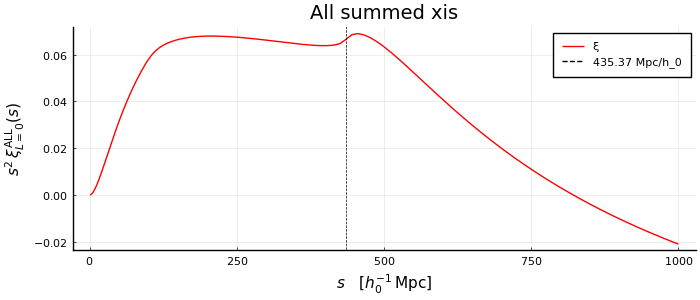

In [21]:
xs = ss
ys = res_sums

S_VLIM = cosmo.s_eff
S_VLIM_F = @sprintf("%.2f", S_VLIM)

pyplot()
P = plot(xs, ys .* xs .^2,
    #xaxis=:log, #yaxis=:log, 
    lc=:red, ls=:solid, size=(700, 300),
    label="ξ", title="All summed xis",
    xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
    ylabel=L"s^2 \, \xi^{\mathrm{ALL}}_{L=%$L}(s)",
    legend=:topright,
)
vline!(P, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

#savefig(P, "xi_"*"$effect"*"_L$L"*".pdf")
#display(P)

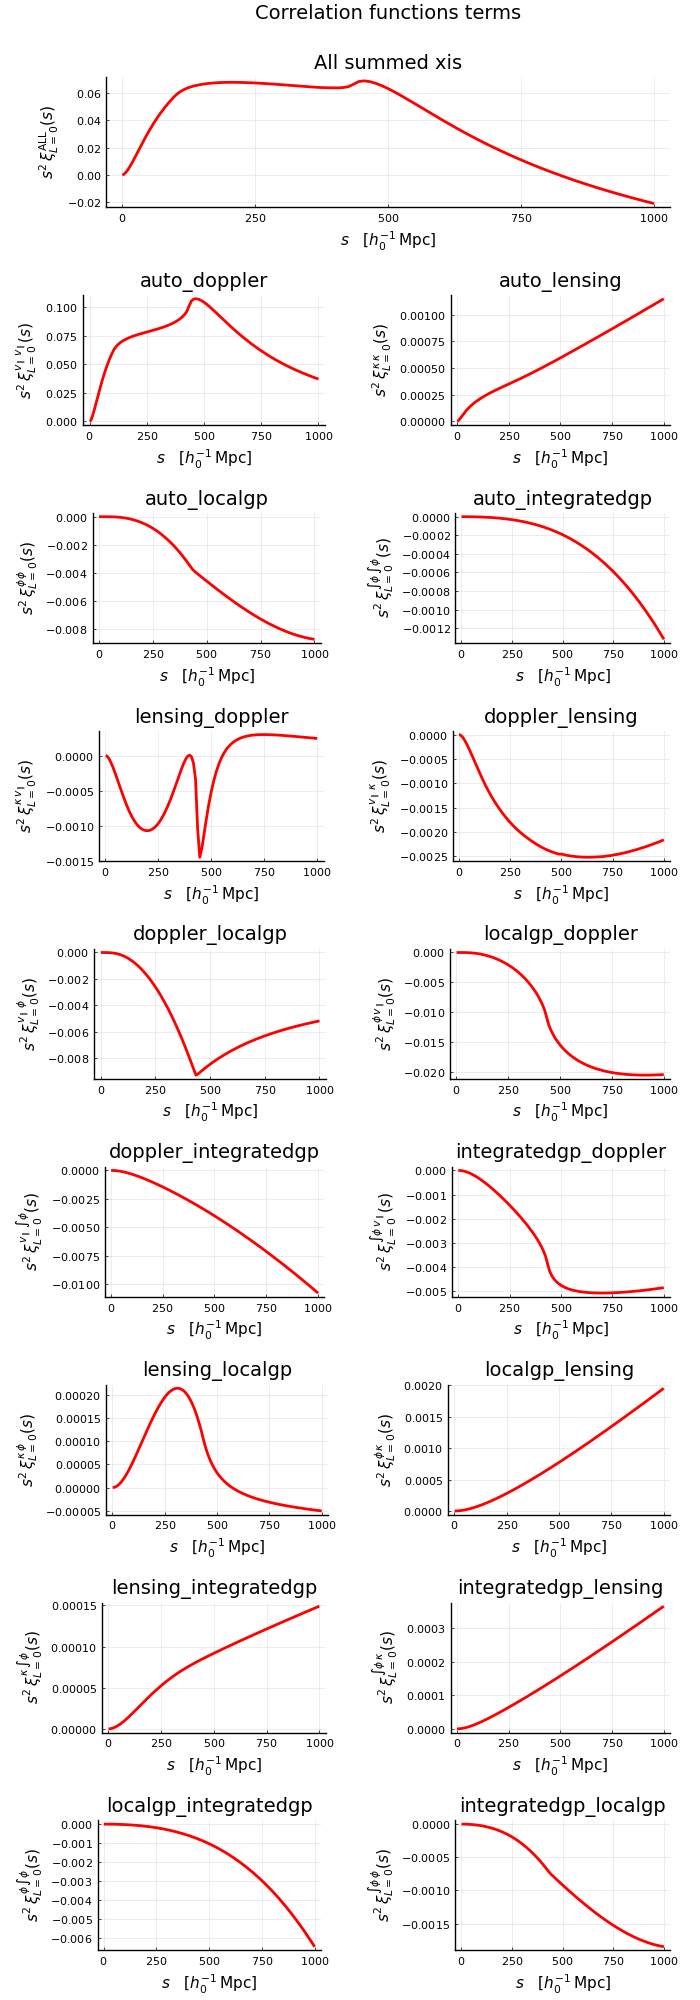

In [19]:
pyplot()
ps = [plot() for i in 1:length(IMPLEMENTED_GR_EFFECTS) + 1]

title = plot(title = "Correlation functions terms", grid=false, 
    showaxis = false, bottom_margin = -50Plots.px, ticks=false)

legend_pos=[
    :bottomleft,
    :bottomleft, :topright, :bottomleft, :bottomleft,
    :topleft, :topleft, :topleft, :topleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
]

xs = ss

ps[1] = plot(xs, res_sums .* xs .^2, size=(300, 100),
        lw=2, lc="red", ls=:solid,
        title="All summed xis", 
        xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
        ylabel=L"s^2 \, \xi^{\mathrm{ALL}}_{L=%$L}(s)",
        #xaxis=:log, #yaxis=:log,
        top_margins=15Plots.px, legend=false)

for i in 1:length(IMPLEMENTED_GR_EFFECTS)
    ys = res_xis[i]

    ps[i+1] = plot(
        xs, ys .* xs .^2, 
        size=(300, 100),
        lw=2, lc="red", ls=:solid,
        title=IMPLEMENTED_GR_EFFECTS[i], 
        xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
        ylabel=L"s^2 \, " * ξs_names[i],
        #xaxis=:log, #yaxis=:log,
        top_margins=15Plots.px,
        legend = false,
    )
end

l = @layout [A{0.05h}; B ; a b ; c d ; e f ; g h ; i l ; m n ; o p ; q r ]
P = plot(title, ps..., layout=l, 
    left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(700,2000))

#savefig(P, "xi_all_cf_L$L"*".pdf")
#display(P)

In [23]:
manually_SUMMED_CFs = [sum([res_xis[i][j] for i in 1:length(res_xis)]) 
    for j in 1:length(res_xis[1])];

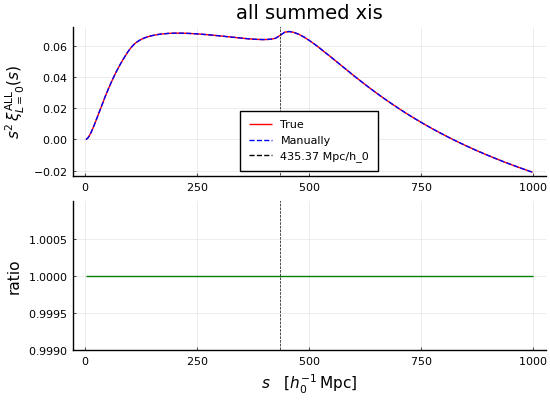

In [29]:
true_xs = ss
xs = ss

true_ys = res_sums
ys = manually_SUMMED_CFs
spline = Spline1D(xs, ys)

S_VLIM = cosmo.s_eff
S_VLIM_F = @sprintf("%.2f", S_VLIM)

pyplot()
p1 = plot(
    [true_xs, xs], 
    [true_ys .* true_xs .^2, ys .* xs .^2], 
    #xaxis = :log, #yaxis = :log, 
    lc = [:red :blue], ls = [:solid :dash],
    label = ["True" "Manually"], title = "all summed xis",
    ylabel = L"s^2 \, \xi^{\mathrm{ALL}}_{L=%$L}(s)",
    legend=:bottom)
vline!(p1, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(true_xs, spline.(true_xs) ./ true_ys, lc=:green, #xaxis=:log,
    ylim=(0.999,1.001), legend=false, ylabel="ratio",
    xlabel=L"$s \quad [h_0^{-1}\,\mathrm{Mpc}]$")
vline!(p2, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

P = plot(p1, p2, size=(550, 400), layout= @layout [ x ; z ] )

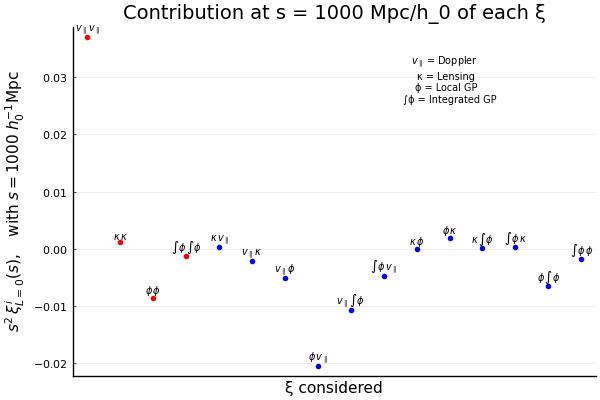

In [152]:
s = 1000
ind = findfirst(x -> x >=s, ss)

names = [
    L"v_{\parallel} \, v_{\parallel}", L"\kappa \, \kappa", 
    L"\phi \, \phi", L"\int\phi \, \int\phi", 
    
    L"\kappa \, v_{\parallel}", L"v_{\parallel} \, \kappa",
    L"v_{\parallel} \, \phi", L"\phi \, v_{\parallel}",
    L"v_{\parallel} \, \int\phi", L"\int\phi \, v_{\parallel}",
    L"\kappa \, \phi", L"\phi \, \kappa",
    L"\kappa \, \int\phi", L"\int\phi \, \kappa",
    L"\phi \, \int\phi", L"\int\phi \, \phi"
];
leg = L"v_{\parallel}"*" = Doppler    \n" *
        "κ = Lensing  \n"*"ϕ = Local GP  \n"*"∫ϕ = Integrated GP"

pyplot()
ys = [res_xis[i][ind] for i in 1:length(res_xis)];
plot(1:16, ys .* (s^2), seriestype=:scatter, 
    series_annotations = [text(name; pointsize=7, valign=:bottom) 
        for name in names], 
    mc=vcat([:red for i in 1:4], [:blue for i in 5:16]), 
    markerstrokewidth = 0, legend=false,
    xlabel = "ξ considered",  xticks=false,
    ylabel = L"s^2 \, \xi^{i}_{L=%$L}(s)," * 
    L" \quad \mathrm{with} \; s = %$s \; h_0^{-1}\mathrm{Mpc}",
    
    title = "Contribution at s = $s Mpc/h_0 of each ξ"
    
)

annotate!([(12, 0.8*max(ys.* (s^2)...), text(leg; pointsize=7))])

\begin{split}
&v_{\parallel} = \mathrm{Doppler} \\
&\kappa = \mathrm{Lensing}  \\
&\phi = \mathrm{Local \, GP}  \\
&\smallint\phi = \mathrm{Integrated \, GP}
\end{split}